## Data Preprocessing

In [200]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [201]:
# Importing the dataset
df = pd.read_csv('RL_SR.csv', sep=';')

In [202]:
df

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
0,0.004,45.00,3.9,2.907,0.237,2.281
1,0.423,45.00,4.2,3.069,0.254,2.477
2,0.805,45.00,4.0,4.226,0.249,3.577
3,1.985,45.00,4.0,4.223,0.317,3.685
4,4.492,45.00,3.3,4.107,0.288,3.619
...,...,...,...,...,...,...
289,1.406,43.75,4.0,5.600,5.733,6.415
290,1.200,43.75,3.2,1.722,2.591,1.489
291,2.147,43.75,3.6,1.767,2.469,1.500
292,1.234,43.75,3.9,1.781,2.387,1.505


In [203]:
df.describe()
# Критических выбросов не наблюдается

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
count,293.000000,292.000000,294.000000,293.00000,294.000000,293.000000
mean,16.643478,43.904966,7.467347,8.34471,5.878480,8.623092
std,9.820152,1.829667,2.413660,1.73226,1.921458,1.873867
min,0.004000,36.000000,0.000000,1.72200,0.137000,1.489000
25%,9.507000,43.750000,6.100000,7.61300,5.328250,8.093000
50%,14.689000,43.750000,7.400000,8.48100,6.127000,8.771000
75%,23.340000,45.000000,8.800000,9.37300,6.953250,9.888000
max,37.219000,45.000000,14.400000,11.47800,9.068000,11.962000


In [204]:
# mean()-3*std
# Let's check how much the data are spread out from the mean.
mean_ActualPower = np.mean(df['ActualPower'], axis=0)
sd_ActualPower = np.std(df['ActualPower'], axis=0)

mean_MaxCapacity = np.mean(df['Max Capacity'], axis=0)
sd_MaxCapacity = np.std(df['Max Capacity'], axis=0)

mean_Location1 = np.mean(df['Location 1'], axis=0)
sd_Location1 = np.std(df['Location 1'], axis=0)

mean_Location2 = np.mean(df['Location 2'], axis=0)
sd_Location2 = np.std(df['Location 2'], axis=0)

mean_Location3 = np.mean(df['Location 3'], axis=0)
sd_Location3 = np.std(df['Location 3'], axis=0)

mean_Location4 = np.mean(df['Location 4'], axis=0)
sd_Location4 = np.std(df['Location 4'], axis=0)

counter_actual_power = 0
counter_maxcapacity = 0
counter_loc1 = 0
counter_loc2 = 0
counter_loc3 = 0
counter_loc4 = 0

for actual_power, maxcapacity, loc1, loc2, loc3, loc4 in zip(df['ActualPower'], df['Max Capacity'], df['Location 1'], df['Location 2'], df['Location 3'], df['Location 4']):
    if not mean_ActualPower - 3*sd_ActualPower <= actual_power <= mean_ActualPower + 3*sd_ActualPower:
        counter_actual_power += 1
    if not mean_MaxCapacity - 3*sd_MaxCapacity <= maxcapacity <= mean_MaxCapacity + 3*sd_MaxCapacity:
        counter_maxcapacity += 1
    if not mean_Location1 - 3*sd_Location1 <= counter_loc1 <= mean_Location1 + 3*sd_Location1:
        counter_loc1 += 1
    if not mean_Location2 - 3*sd_Location2 <= counter_loc2 <= mean_Location2 + 3*sd_Location2:
        counter_loc2 += 1
    if not mean_Location3 - 3*sd_Location3 <= counter_loc3 <= mean_Location3 + 3*sd_Location3:
        counter_loc3 += 1
    if not mean_Location4 - 3*sd_Location4 <= counter_loc4 <= mean_Location4 + 3*sd_Location4:
        counter_loc4 += 1

counter_dicts = {'counter_actual_power': counter_actual_power,
                'counter_maxcapacity': counter_maxcapacity,
                'counter_loc1': counter_loc1,
                'counter_loc2': counter_loc2,
                'counter_loc3': counter_loc3,
                'counter_loc4': counter_loc4}
print(counter_dicts)

{'counter_actual_power': 1, 'counter_maxcapacity': 17, 'counter_loc1': 1, 'counter_loc2': 4, 'counter_loc3': 1, 'counter_loc4': 4}


In [205]:
# Outliers
actual_power = []
for ap in df['ActualPower']:
    if ap > df['ActualPower'].mean() + 3 * df['ActualPower'].std():
        ap = df['ActualPower'].mean() + 3*df['ActualPower'].std()
    elif ap < df['ActualPower'].mean() - 3 * df['ActualPower'].std():
        ap = df['ActualPower'].mean() - 3*df['ActualPower'].std()
    actual_power.append(ap)
df['ActualPower']  = actual_power

maxcapacity = []
for m in df['Max Capacity']:
    if m > df['Max Capacity'].mean() + 3 * df['Max Capacity'].std():
        m = df['Max Capacity'].mean() + 3*df['Max Capacity'].std()
    elif m < df['Max Capacity'].mean() - 3 * df['Max Capacity'].std():
        m = df['Max Capacity'].mean() - 3*df['Max Capacity'].std()
    maxcapacity.append(m)
df['Max Capacity']  = maxcapacity

loc1 = []
for loc in df['Location 1']:
    if loc > df['Location 1'].mean() + 3 * df['Location 1'].std():
        loc = df['Location 1'].mean() + 3*df['Location 1'].std()
    elif loc < df['Location 1'].mean() - 3 * df['Location 1'].std():
        loc = df['Location 1'].mean() - 3*df['Location 1'].std()
    loc1.append(loc)
df['Location 1'] = loc1

loc2 = []
for loc in df['Location 2']:
    if loc > df['Location 2'].mean() + 3 * df['Location 2'].std():
        loc = df['Location 2'].mean() + 3*df['Location 2'].std()
    elif loc < df['Location 2'].mean() - 3 * df['Location 2'].std():
        loc = df['Location 2'].mean() - 3*df['Location 2'].std()
    loc2.append(loc)
df['Location 2'] = loc2

loc3 = []
for loc in df['Location 3']:
    if loc > df['Location 3'].mean() + 3 * df['Location 3'].std():
        loc = df['Location 3'].mean() + 3*df['Location 3'].std()
    elif loc < df['Location 3'].mean() - 3 * df['Location 3'].std():
        loc = df['Location 3'].mean() - 3*df['Location 3'].std()
    loc3.append(loc)
df['Location 3'] = loc3

loc4 = []
for loc in df['Location 4']:
    if loc > df['Location 4'].mean() + 3 * df['Location 4'].std():
        loc = df['Location 4'].mean() + 3*df['Location 4'].std()
    elif loc < df['Location 4'].mean() - 3 * df['Location 4'].std():
        loc = df['Location 4'].mean() - 3*df['Location 4'].std()
    loc4.append(loc)
df['Location 4'] = loc4

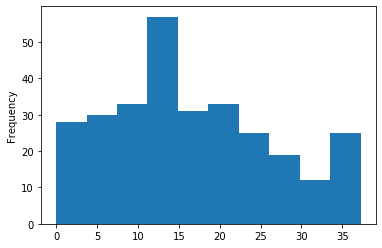

In [206]:
# ActualPower distribution
df['ActualPower'].plot(kind = 'hist')

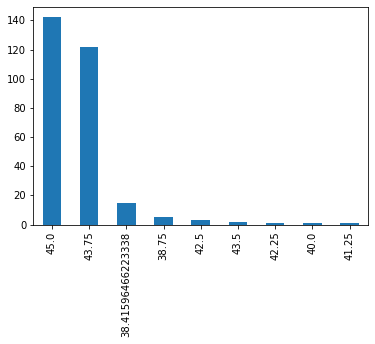

In [207]:
# Max Capacity distribution
distribution = df['Max Capacity'].value_counts()
distribution.plot(kind='bar')

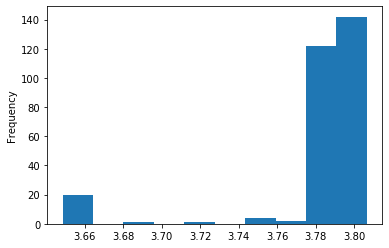

In [208]:
# Max Capacity distribution log
distribution = np.log(df['Max Capacity'])
distribution.plot(kind = 'hist')

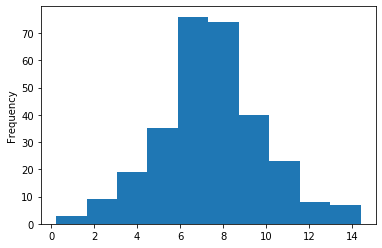

In [209]:
# Location 1 distribution
df['Location 1'].plot(kind = 'hist')

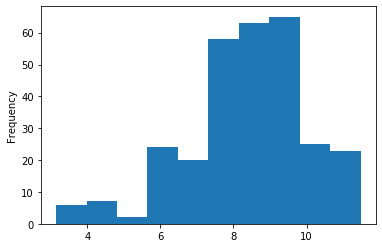

In [210]:
# Location 2 distribution
df['Location 2'].plot(kind = 'hist')

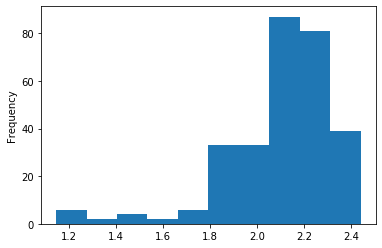

In [211]:
# Location 2 distribution log
distribution = np.log(df['Location 2'])
distribution.plot(kind = 'hist')

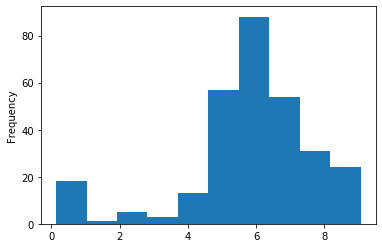

In [212]:
# Location 3 distribution
df['Location 3'].plot(kind = 'hist')

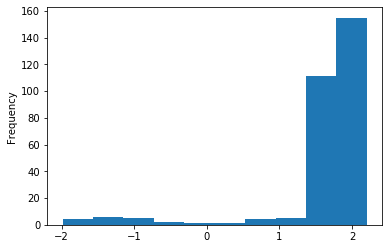

In [213]:
# Location 3 distribution log
distribution = np.log(df['Location 3'])
distribution.plot(kind = 'hist')

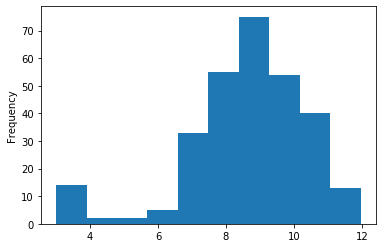

In [214]:
# Location 4 distribution
df['Location 4'].plot(kind = 'hist')

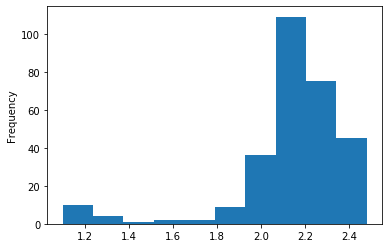

In [215]:
# Location 4 distribution log
distribution = np.log(df['Location 4'])
distribution.plot(kind = 'hist')

In [216]:
df.isnull().sum()
# Таким образом мы имеем пропущенные значения в таких колонках:

ActualPower     1
Max Capacity    2
Location 1      0
Location 2      1
Location 3      0
Location 4      1
dtype: int64

In [217]:
# Taking care of missing data
# https://scikit-learn.org/
from sklearn.impute import SimpleImputer
#numeric
df[['ActualPower']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ActualPower']]).round()
df[['Max Capacity']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Max Capacity']]).round()
df[['Location 2']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 2']]).round()
df[['Location 4']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 4']]).round()

In [218]:
df_log = pd.DataFrame()
df_log['ActualPower']=df['ActualPower']
df_log['Max Capacity']=np.log(df['Max Capacity'])
df_log['Location 1']=df['Location 1']
df_log['Location 2']=np.log(df['Location 2'])
df_log['Location 3']=np.log(df['Location 3'])
df_log['Location 4']=np.log(df['Location 4'])

## Linear Regression

In [219]:
df_log

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
0,0.0,3.806662,3.9,1.098612,-1.439695,1.098612
1,0.0,3.806662,4.2,1.098612,-1.370421,1.098612
2,1.0,3.806662,4.0,1.386294,-1.390302,1.386294
3,2.0,3.806662,4.0,1.386294,-1.148854,1.386294
4,4.0,3.806662,3.3,1.386294,-1.244795,1.386294
...,...,...,...,...,...,...
289,1.0,3.784190,4.0,1.791759,1.746239,1.791759
290,1.0,3.784190,3.2,1.098612,0.952044,1.098612
291,2.0,3.784190,3.6,1.098612,0.903813,1.098612
292,1.0,3.784190,3.9,1.098612,0.870037,1.098612


In [220]:
# Cheking correlations
df_log.corr()

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
ActualPower,1.000000,-0.407536,0.379332,0.433053,0.115857,0.393509
Max Capacity,-0.407536,1.000000,-0.536676,-0.199666,-0.255722,-0.301019
Location 1,0.379332,-0.536676,1.000000,0.625311,0.656575,0.721600
Location 2,0.433053,-0.199666,0.625311,1.000000,0.626065,0.932485
Location 3,0.115857,-0.255722,0.656575,0.626065,1.000000,0.794625
Location 4,0.393509,-0.301019,0.721600,0.932485,0.794625,1.000000


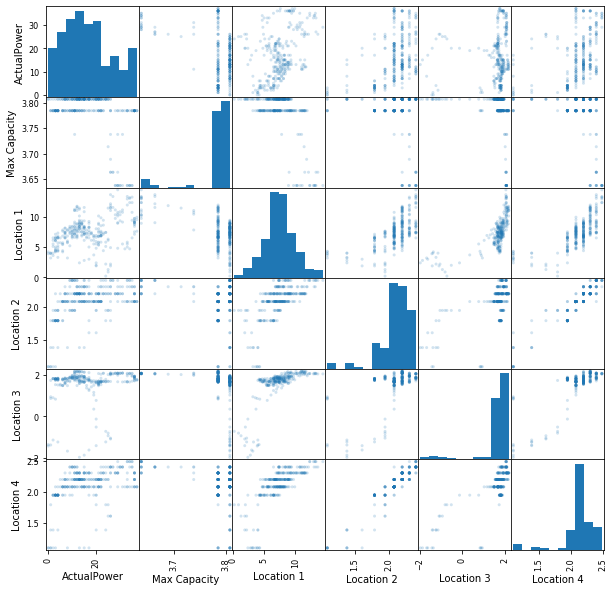

In [221]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_log, alpha=0.2, figsize=(10, 10))
plt.show()

In [222]:
# Splitting the dataset into the Training set and Test set
X = df_log.iloc[:, 1:6].values
y = df_log.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [223]:
# Fitting Simple Linear Regression to the Training set (ActualPower)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 2:3], y_train)

In [224]:
# Getting parameters
sr.coef_, sr.intercept_

(array([17.91103715]), -21.049657078580022)

In [225]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 2:3])

In [226]:
# Coefficient of determination R^2
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 2:3], y_test)

(0.1908749365272442, 0.17233498442617246)

In [227]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(77.54786471167098, 80.32036031055034)

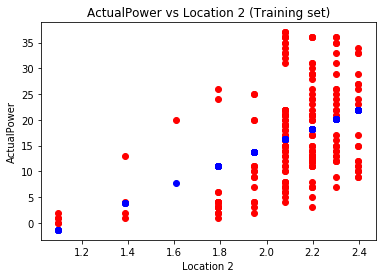

In [228]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sr.predict(X_train[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

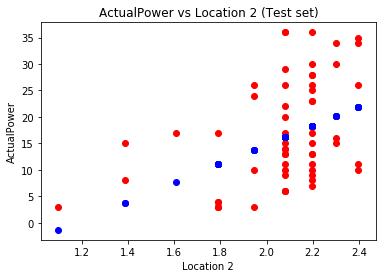

In [229]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sr.predict(X_test[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [230]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [231]:
# Getting parameters
mr.coef_, mr.intercept_

(array([-80.32771757,   0.43800275,  14.7619549 ,  -5.71477801,
          9.2965157 ]),
 276.04715900565003)

In [232]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [233]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.3510663176818859, 0.44470012975574835)

In [234]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(62.194861678445626, 53.88881349237319)

In [235]:
# !pip install statsmodels
# p-values
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues
#mr1.summary()

array([5.70052315e-05, 7.64209939e-06, 2.47648080e-01, 4.69894962e-02,
       1.94119385e-05, 2.94837682e-01])

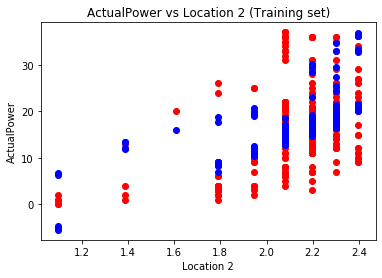

In [236]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], mr.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

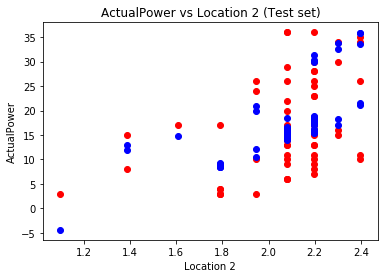

In [237]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [238]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [239]:
# Getting parameters
pr.coef_, pr.intercept_

(array([18.1034046 , -0.05165562]), -21.22284326775601)

In [240]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [241]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.19087526134588262, 0.1721999186006038)

In [242]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(77.54783358052332, 80.33346770976522)

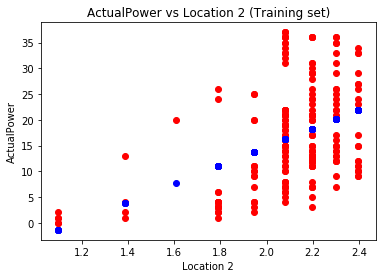

In [243]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

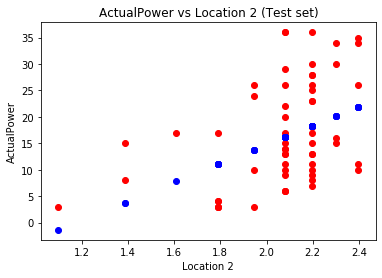

In [244]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [245]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [246]:
X_Modeled

array([[ 3.80666249,  7.6       ,  1.83848401,  2.19722458],
       [ 3.80666249,  7.3       ,  1.86810304,  2.39789527],
       [ 3.80666249,  6.1       ,  1.03673688,  2.07944154],
       [ 3.80666249,  6.8       ,  1.95302762,  2.19722458],
       [ 3.80666249,  7.8       ,  1.82358108,  2.07944154],
       [ 3.78418963,  9.3       ,  2.10132534,  2.39789527],
       [ 3.78418963,  4.7       ,  1.67109729,  2.07944154],
       [ 3.80666249,  6.9       ,  1.53772706,  2.07944154],
       [ 3.78418963,  6.5       ,  1.71054941,  2.07944154],
       [ 3.78418963,  4.        ,  1.74623895,  1.79175947],
       [ 3.80666249,  7.3       ,  1.72026347,  2.39789527],
       [ 3.78418963,  4.4       ,  1.79641528,  1.94591015],
       [ 3.78418963,  6.        ,  1.71972627,  2.19722458],
       [ 3.80666249,  5.3       ,  1.5723589 ,  2.19722458],
       [ 3.73766962, 10.7       ,  2.1071783 ,  2.39789527],
       [ 3.78418963,  6.8       ,  1.80104952,  2.19722458],
       [ 3.78418963, 11.

In [247]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 0:4], y_train)

In [248]:
# Getting parameters
omr.coef_, omr.intercept_

(array([-83.62268193,   0.52170896,  21.84091709,  -4.86996451]),
 291.436212016663)

In [249]:
# Predicting the Test set results
y_pred = omr.predict(X_test[:, 0:4])

In [250]:
# Coefficient of determination R^2
omr.score(X_train[:, 0:4], y_train), omr.score(X_test[:, 0:4], y_test)

(0.3479422499743793, 0.4369496099590431)

In [251]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 0:4])), mean_squared_error(y_test, y_pred)

(62.49427741881587, 54.64095902341732)

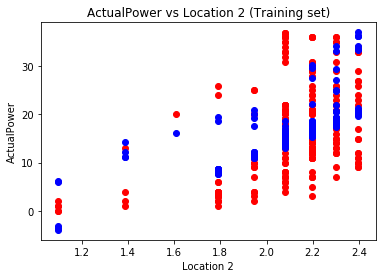

In [252]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], omr.predict(X_train[:, 0:4]), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

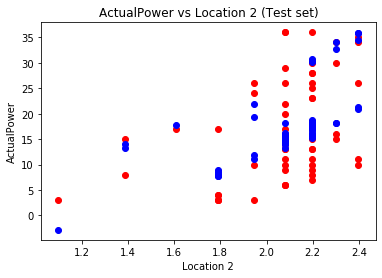

In [253]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], omr.predict(X_test[:, 0:4]), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

## Regression Tree & Random Forest

In [254]:
df_log

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
0,0.0,3.806662,3.9,1.098612,-1.439695,1.098612
1,0.0,3.806662,4.2,1.098612,-1.370421,1.098612
2,1.0,3.806662,4.0,1.386294,-1.390302,1.386294
3,2.0,3.806662,4.0,1.386294,-1.148854,1.386294
4,4.0,3.806662,3.3,1.386294,-1.244795,1.386294
...,...,...,...,...,...,...
289,1.0,3.784190,4.0,1.791759,1.746239,1.791759
290,1.0,3.784190,3.2,1.098612,0.952044,1.098612
291,2.0,3.784190,3.6,1.098612,0.903813,1.098612
292,1.0,3.784190,3.9,1.098612,0.870037,1.098612


In [255]:
# Splitting the dataset into the Training set and Test set
X = df_log.iloc[:, :-1].values
y = df_log.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [256]:
# Fitting Tree to the Training set (Location 2)
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 2:3], y_train)

In [257]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 2:3])

In [258]:
# Coefficient of determination R^2 (Коеффициент детерминации значительно выше, чем в предыдущих моделях. Regression Tree уже есть смысл использовать)
sdt.score(X_train[:, 2:3], y_train), sdt.score(X_test[:, 2:3], y_test)

(0.761048882782419, 0.7198186570370979)

In [259]:
# Mean squared error 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sdt.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(0.015329857642374097, 0.028014451710926282)

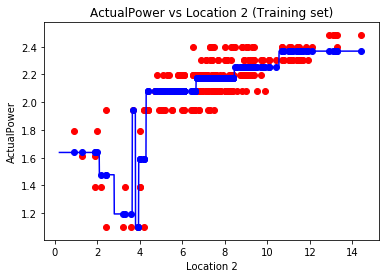

In [260]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sdt.predict(X_train[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

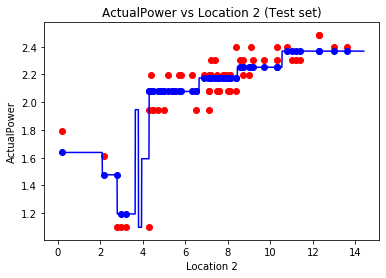

In [261]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 2:3]), max(X[:, 2:3]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sdt.predict(X_test[:, 2:3]), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [262]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [263]:
# Predicting the Test set results
y_pred = dt.predict(X_test)

In [264]:
# Coefficient of determination R^2
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.9480800376972474)

In [265]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(7.48998253095482e-32, 0.005191313816195695)

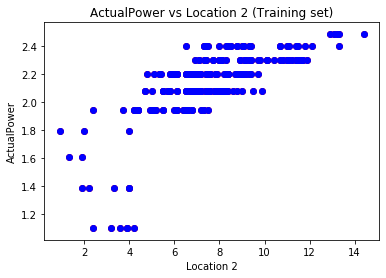

In [266]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], dt.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

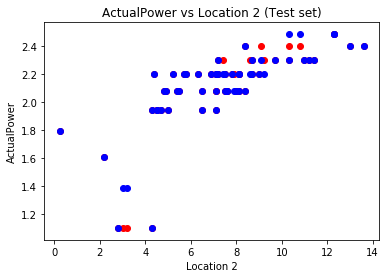

In [267]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], dt.predict(X_test), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [268]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [269]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

In [270]:
# Coefficient of determination R^2
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9872288937522067, 0.9312037957913394)

In [271]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(0.0008193275804441426, 0.006878716192582933)

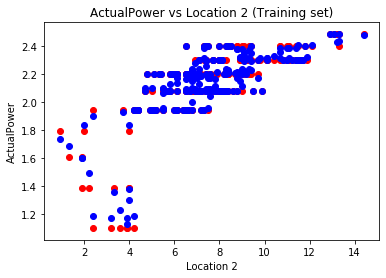

In [272]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rf.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

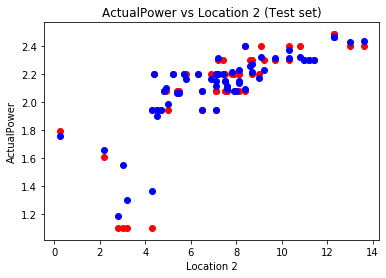

In [273]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], rf.predict(X_test), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

## Regression Neural Network

In [274]:
df_log

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
0,0.0,3.806662,3.9,1.098612,-1.439695,1.098612
1,0.0,3.806662,4.2,1.098612,-1.370421,1.098612
2,1.0,3.806662,4.0,1.386294,-1.390302,1.386294
3,2.0,3.806662,4.0,1.386294,-1.148854,1.386294
4,4.0,3.806662,3.3,1.386294,-1.244795,1.386294
...,...,...,...,...,...,...
289,1.0,3.784190,4.0,1.791759,1.746239,1.791759
290,1.0,3.784190,3.2,1.098612,0.952044,1.098612
291,2.0,3.784190,3.6,1.098612,0.903813,1.098612
292,1.0,3.784190,3.9,1.098612,0.870037,1.098612


In [275]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfsc = sc.fit_transform(df)
df_log['ActualPower'] = dfsc[:,0]
df_log['Max Capacity'] = dfsc[:,1]
df_log['Location 1'] = dfsc[:,2]
df_log['Location 2'] = dfsc[:,3]
df_log['Location 3'] = dfsc[:,4]
df_log['Location 4'] = dfsc[:,5]

In [276]:
# Cheking correlations
df_log.corr()

,ActualPower,Max Capacity,Location 1,Location 2,Location 3,Location 4
ActualPower,1.000000,-0.407037,0.379332,0.425873,0.176696,0.432648
Max Capacity,-0.407037,1.000000,-0.537528,-0.232178,-0.426030,-0.381246
Location 1,0.379332,-0.537528,1.000000,0.652382,0.796576,0.777234
Location 2,0.425873,-0.232178,0.652382,1.000000,0.587584,0.922757
Location 3,0.176696,-0.426030,0.796576,0.587584,1.000000,0.762429
Location 4,0.432648,-0.381246,0.777234,0.922757,0.762429,1.000000


In [277]:
# Splitting the dataset into the Training set and Test set
X = df_log.iloc[:, 1:6].values
y = df_log.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [278]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
# !pip3 install keras
# !pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

In [279]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 6, activation = 'tanh', input_dim = 5))

# Adding the second hidden layer
rnn.add(Dense(units = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [280]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1181 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 956us/step - loss: 1.0320 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9558 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9079 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8636 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 997us/step - loss: 0.8325 - accuracy: 0.0000e+00
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8071 - accuracy: 0.0000e+00
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7853 - accuracy: 0.0000e+00
Epoch 9/100
24/24 [==============================] - 0s 997us/step - loss: 0.7674 - accuracy: 0.0000e+00
Epoch 10/100
24/24 [==============================] - 0s 2ms/step -

In [281]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

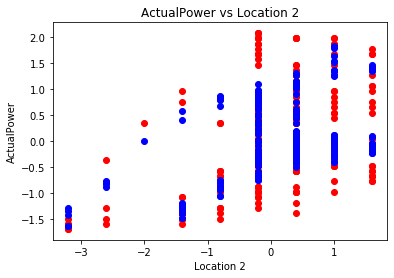

In [282]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rnn.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

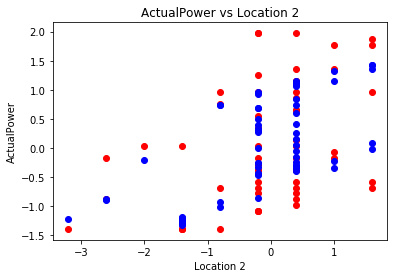

In [283]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], rnn.predict(X_test), 'bo')
plt.title('ActualPower vs Location 2')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [284]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
y_pred_test = rnn.predict(X_test)
print("Mean Squared Error for Test Set:")
rnn1_metrics.append(mean_squared_error(y_pred_test, y_test))
mean_squared_error(y_pred_test, y_test)

Mean Squared Error for Test Set:


0.490490753697292

In [285]:
y_pred_train = rnn.predict(X_train)
print("Mean Squared Error for Train Set:")
rnn1_metrics.append(mean_squared_error(y_pred_train, y_train))
mean_squared_error(y_pred_train, y_train)

Mean Squared Error for Train Set:


0.3771361099444928

In [286]:
# Как вывод наблюдаем, что по метрике MSE для тестовой виборки лучшей является модель дерева решений. 
# Также отметим, что достаточно неплохой оказалась регрессионная модель нейронных сетей, однако она уступает по тестовой MSE моделям Regression Tree и Random Forest
# Таким образом, лучшими моделями по критерию MSE для тестовой выборки являются Regression Tree, Random Forest и Regression Neural Network.

# Ниже расположены краткие оценки моделей по убыванию.

# Regression Tree
# Coefficient of determination R^2
# (1.0, 0.9470117847884222)
# Mean squared error
# (7.48998253095482e-32, 0.0052981250664126695)

# Random Forest
# Coefficient of determination R^2
# (0.9872288937522067, 0.9312037957913394)
# Mean squared error
# (0.0008193275804441426, 0.006878716192582933)

# Regression Neural Network
# Mean squared error
# (0.45263429242919107, 0.2759985798707595)

# Multiple Linear Regression
# Coefficient of determination R^2
# (0.3510663176818859, 0.44470012975574835)
# Mean squared error
# (62.194861678445626, 53.88881349237319)

# Backward Elimination with p-values
# Coefficient of determination R^2
# (0.3479422499743793, 0.4369496099590431)
# Mean squared error
# (62.49427741881587, 54.64095902341732)

# Simple Linear Regression
# Coefficient of determination R^2
# (0.1908749365272442, 0.17233498442617246)
# Mean squared error
# (77.54786471167098, 80.32036031055034)

# Polynomial Regression
# Coefficient of determination R^2
# (0.19087526134588262, 0.1721999186006038)
# Mean squared error
# (77.54783358052332, 80.33346770976522)